## IS6 in Python: Sampling Distribution and Confidence Intervals for Proportions (Chapter 13)

### Introduction and background

This document is intended to assist students in undertaking examples shown in the Sixth Edition of Intro Stats (2022) by De Veaux, Velleman, and Bock. This pdf file as well as the associated ipynb reproducible analysis source file used to create it can be found at (INSERT WEBSITE LINK HERE).

#### Chapter 13: Sampling distribution models and confidence intervals for proportions

In [82]:
#Load in libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.api import qqplot
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [15]:
#Figure 13.1, page 432
baby = pd.read_csv("datasets/babysamp-98.txt", sep = "\t")
baby.head()
#Wrangle data, not mandatory
baby = baby.assign(state = lambda baby: baby["preemie"].map(lambda preemie: "Normal" if preemie == False else "Premature"))
baby.head()

,MomAge,DadAge,MomEduc,MomMarital,numlive,dobmm,gestation,sex,weight,prenatalstart,orig.id,preemie,state
0,35,35.0,17.0,1,2,2,39,F,3175,1.0,1047483,False,Normal
1,22,21.0,12.0,1,1,3,42,F,3884,2.0,1468100,False,Normal
2,35,42.0,15.0,1,0,6,39,F,3030,2.0,2260016,False,Normal
3,23,NaN,6.0,1,2,8,40,F,3629,1.0,3583052,False,Normal
4,23,28.0,13.0,1,0,9,42,F,3481,2.0,795674,False,Normal


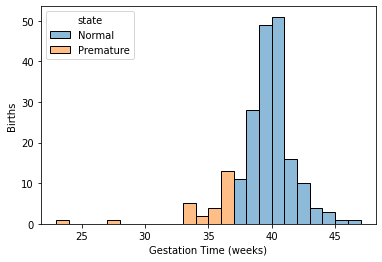

In [19]:
sns.histplot(data = baby, x = "gestation", hue = "state", binwidth = 1)
plt.xlabel("Gestation Time (weeks)")
plt.ylabel("Births")
plt.show()

#### Section 13.1: The Sampling Distribution Model for a Proportion
#### The Normal Model
#### Section 13.2: When does the Normal Model work? Assumptions and Conditions
#### Random Matters: Does the Normal Model Always Work? Sampling Distributions for Other Statistics

In [20]:
#Page 439
fat = pd.read_csv("datasets/bodyfat.txt", sep = "\t")
fat.head()

,Density,Pct.BF,Age,Weight,Height,Neck,Chest,Abdomen,Waist,Hip,Thigh,Knee,Ankle,Bicep,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,33.543307,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,32.677165,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,34.606299,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,34.015748,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,39.370079,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [31]:
#df stats of one sample
data = fat.sample(10, random_state = 1)
data["Weight"].describe()

count     10.000000
mean     177.925000
std       25.297961
min      140.000000
25%      159.937500
50%      179.875000
75%      192.250000
max      216.000000
Name: Weight, dtype: float64

In [63]:
#df stats of another sample
data = fat["Weight"].sample(10, random_state = 13)
df_stats = data.describe()
print(df_stats)

count     10.000000
mean     176.175000
std       23.925245
min      146.000000
25%      155.687500
50%      168.125000
75%      199.437500
max      210.500000
Name: Weight, dtype: float64


In [62]:
print(type(df_stats))
print(df_stats.iloc[5])

<class 'pandas.core.series.Series'>
168.125


In [74]:
#Sample 1000 times
num_sim = 1000
medians = np.zeros(num_sim)
variances = np.zeros(num_sim)
minimums = np.zeros(num_sim)
for i in range(num_sim):
    data = fat["Weight"].sample(10, random_state = i)
    df_stats = data.describe()
    medians[i] = df_stats[5]
    variances[i] = data.var()
    minimums[i] = df_stats[3]

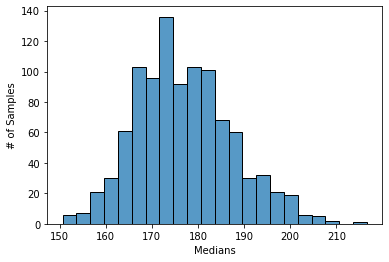

In [78]:
sns.histplot(data = medians, binwidth = 3)
plt.xlabel("Medians")
plt.ylabel("# of Samples")
plt.show()

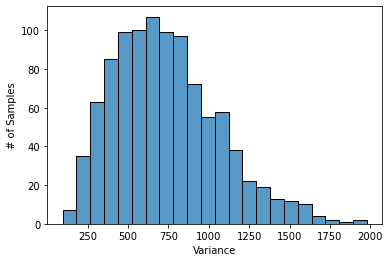

In [79]:
sns.histplot(data = variances)
plt.xlabel("Variance")
plt.ylabel("# of Samples")
plt.show()

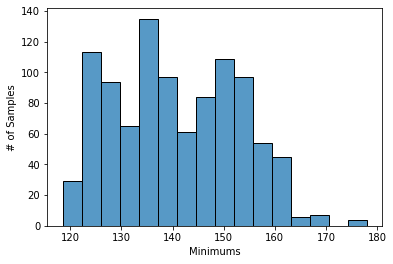

In [80]:
sns.histplot(data = minimums)
plt.xlabel("Minimums")
plt.ylabel("# of Samples")
plt.show()

#### Section 13.3: A Confidence Interval for a Proportion
#### Section 13.4: Interpreting Confidence Intervals: What Does 95% Confidence Really Mean?
First we can replicate the example on pages 443 - 445

In [94]:
#Steps shown in previous IS5 for R
y = 1034
n = 1520
phat = y / n
print(f"phat: {phat}")
sephat = np.sqrt(phat * (1 - phat) / n)
print(f"sephat: {sephat}")
interval = pd.Interval(phat - 2*sephat, phat + 2*sephat, closed = "both")
print(f"interval: {interval}")

phat: 0.6802631578947368
sephat: 0.011962254064617532
interval: [0.6563386497655017, 0.7041876660239719]


In [110]:
z_test , p_value = proportions_ztest(count = 1034 , nobs = 1520, value = 0.5, alternative = "two-sided")

# Print results
print("The z test values is: ", z_test, ". The p-value is: ", p_value)

The z test values is:  15.069330321943829 . The p-value is:  2.5771198966468344e-51


Question: I don't quite unerstand what the arguent "value" is for

In [113]:
# Calculate confidence interval and store in conf_prop
conf_prop = proportion_confint(count = 1034, nobs = 1520, alpha = 0.05)
print(conf_prop)

(0.6568175707541686, 0.703708745035305)


Question: I don't know how to make the Confidence Intervals plot (Random Matters - page 444)

#### Section 13.5: Margin of Error: Certainty vs Precision
#### Section 13.6: Choosing the Sample Size